In [285]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [286]:
import seaborn as sns
import matplotlib.pyplot as plt

In [287]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [288]:
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [289]:

train  = train.drop(['PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu'],axis=1)
train.shape

(1460, 76)

In [290]:
test  = test.drop(['PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu'],axis=1)
test.shape

(1459, 75)

<AxesSubplot:>

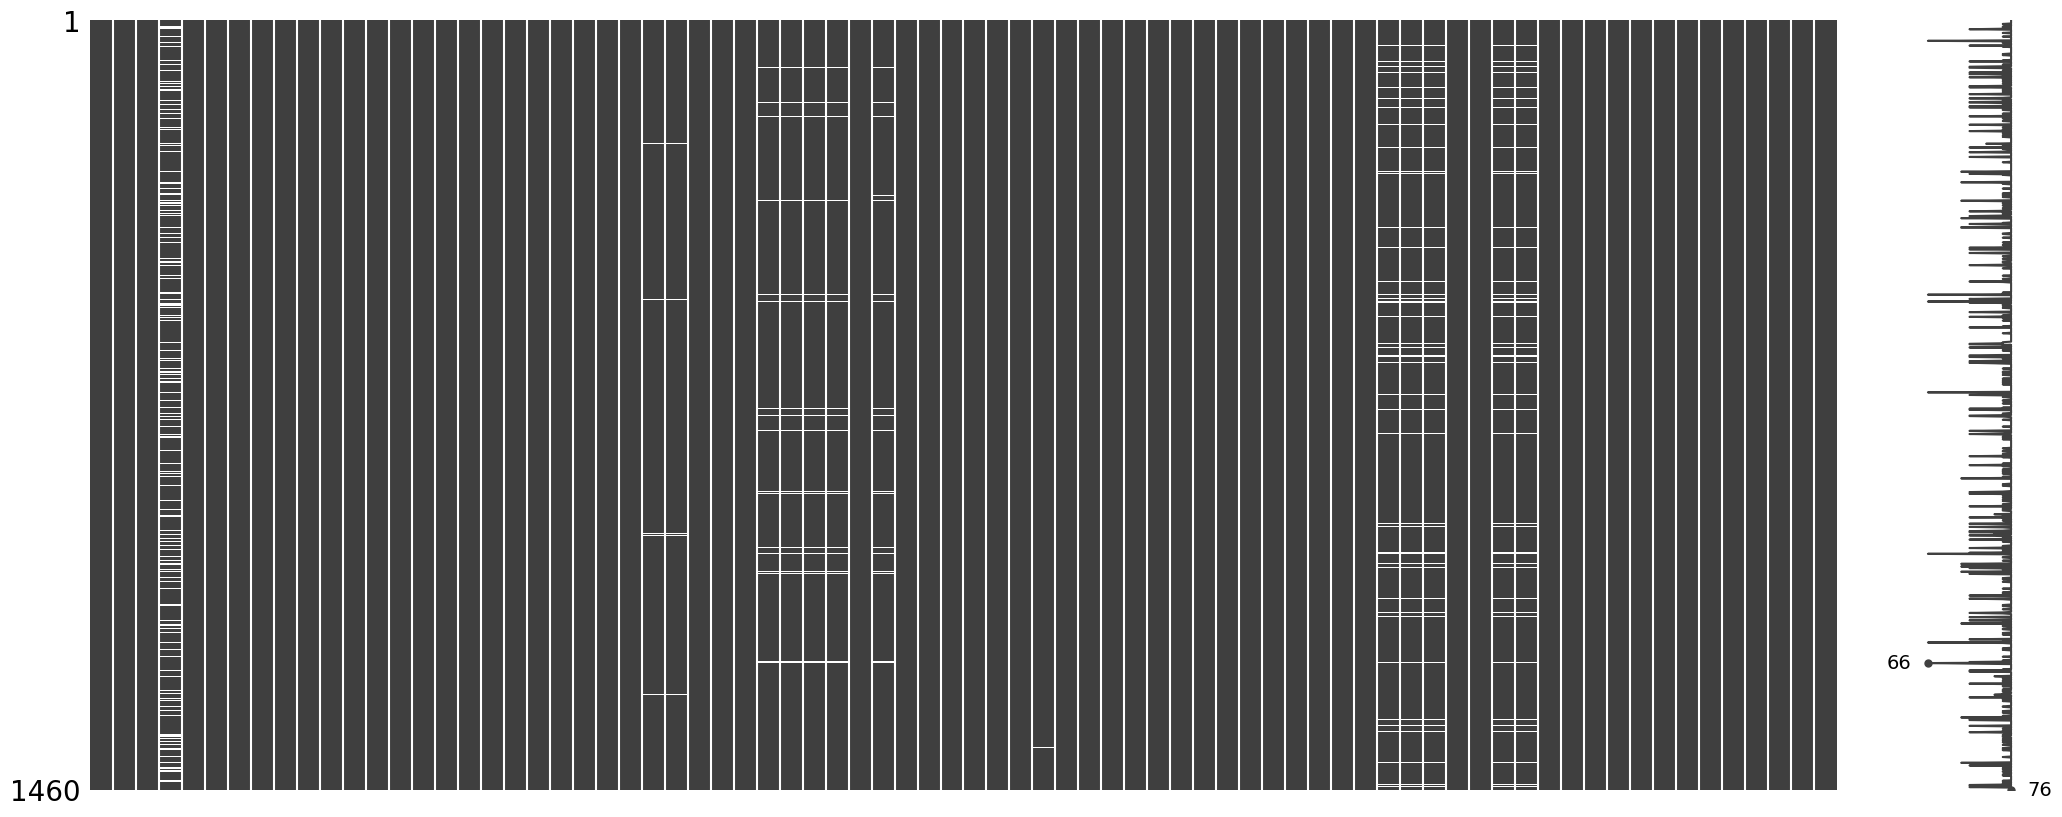

In [291]:
import missingno
missingno.matrix(train)

<AxesSubplot:>

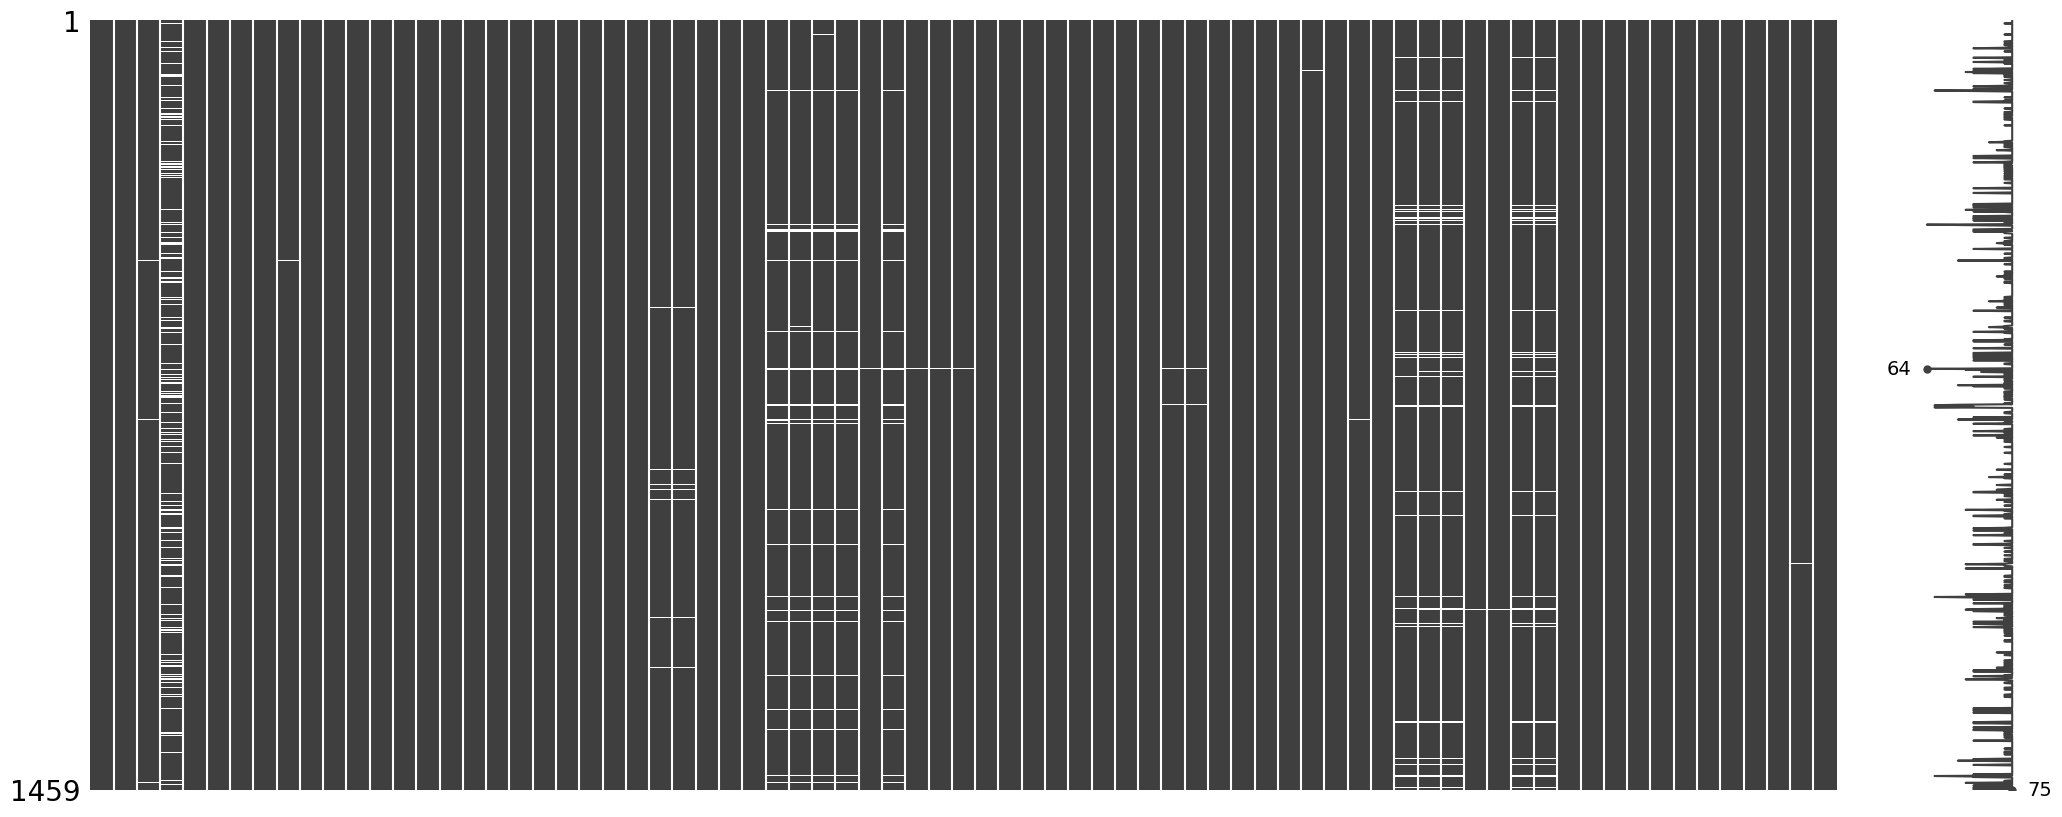

In [292]:
missingno.matrix(test)

<AxesSubplot:>

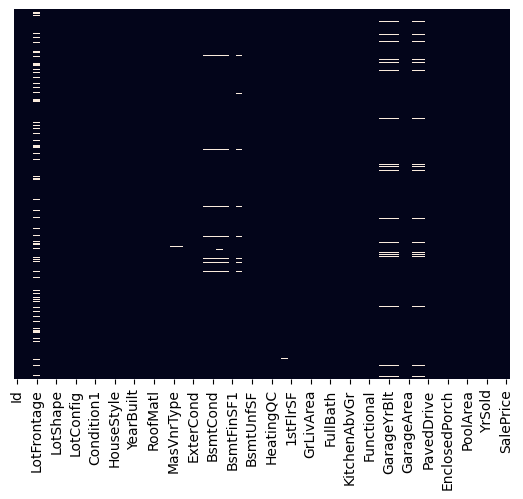

In [293]:
sns.heatmap(train.isnull(), yticklabels=False,fmt ='0.2f',cbar=False)

<AxesSubplot:>

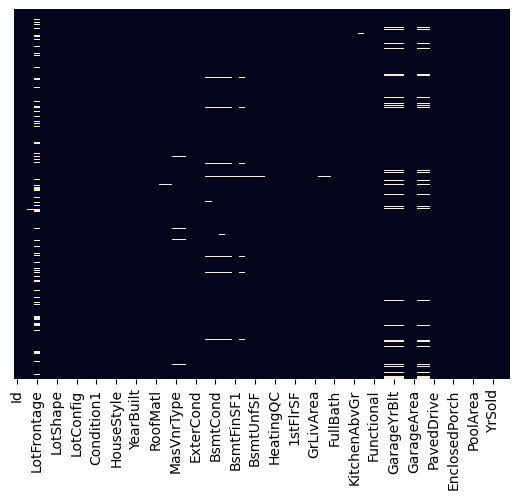

In [294]:
sns.heatmap(test.isnull(), yticklabels=False,fmt = '0.2f',cbar=False)

In [295]:
train.isnull().sum().sort_values(ascending =False)

LotFrontage     259
GarageType       81
GarageCond       81
GarageYrBlt      81
GarageFinish     81
               ... 
BsmtUnfSF         0
TotalBsmtSF       0
MSSubClass        0
HeatingQC         0
SalePrice         0
Length: 76, dtype: int64

In [296]:
test.isnull().sum().sort_values(ascending =False)

LotFrontage      227
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
                ... 
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
SaleCondition      0
Length: 75, dtype: int64

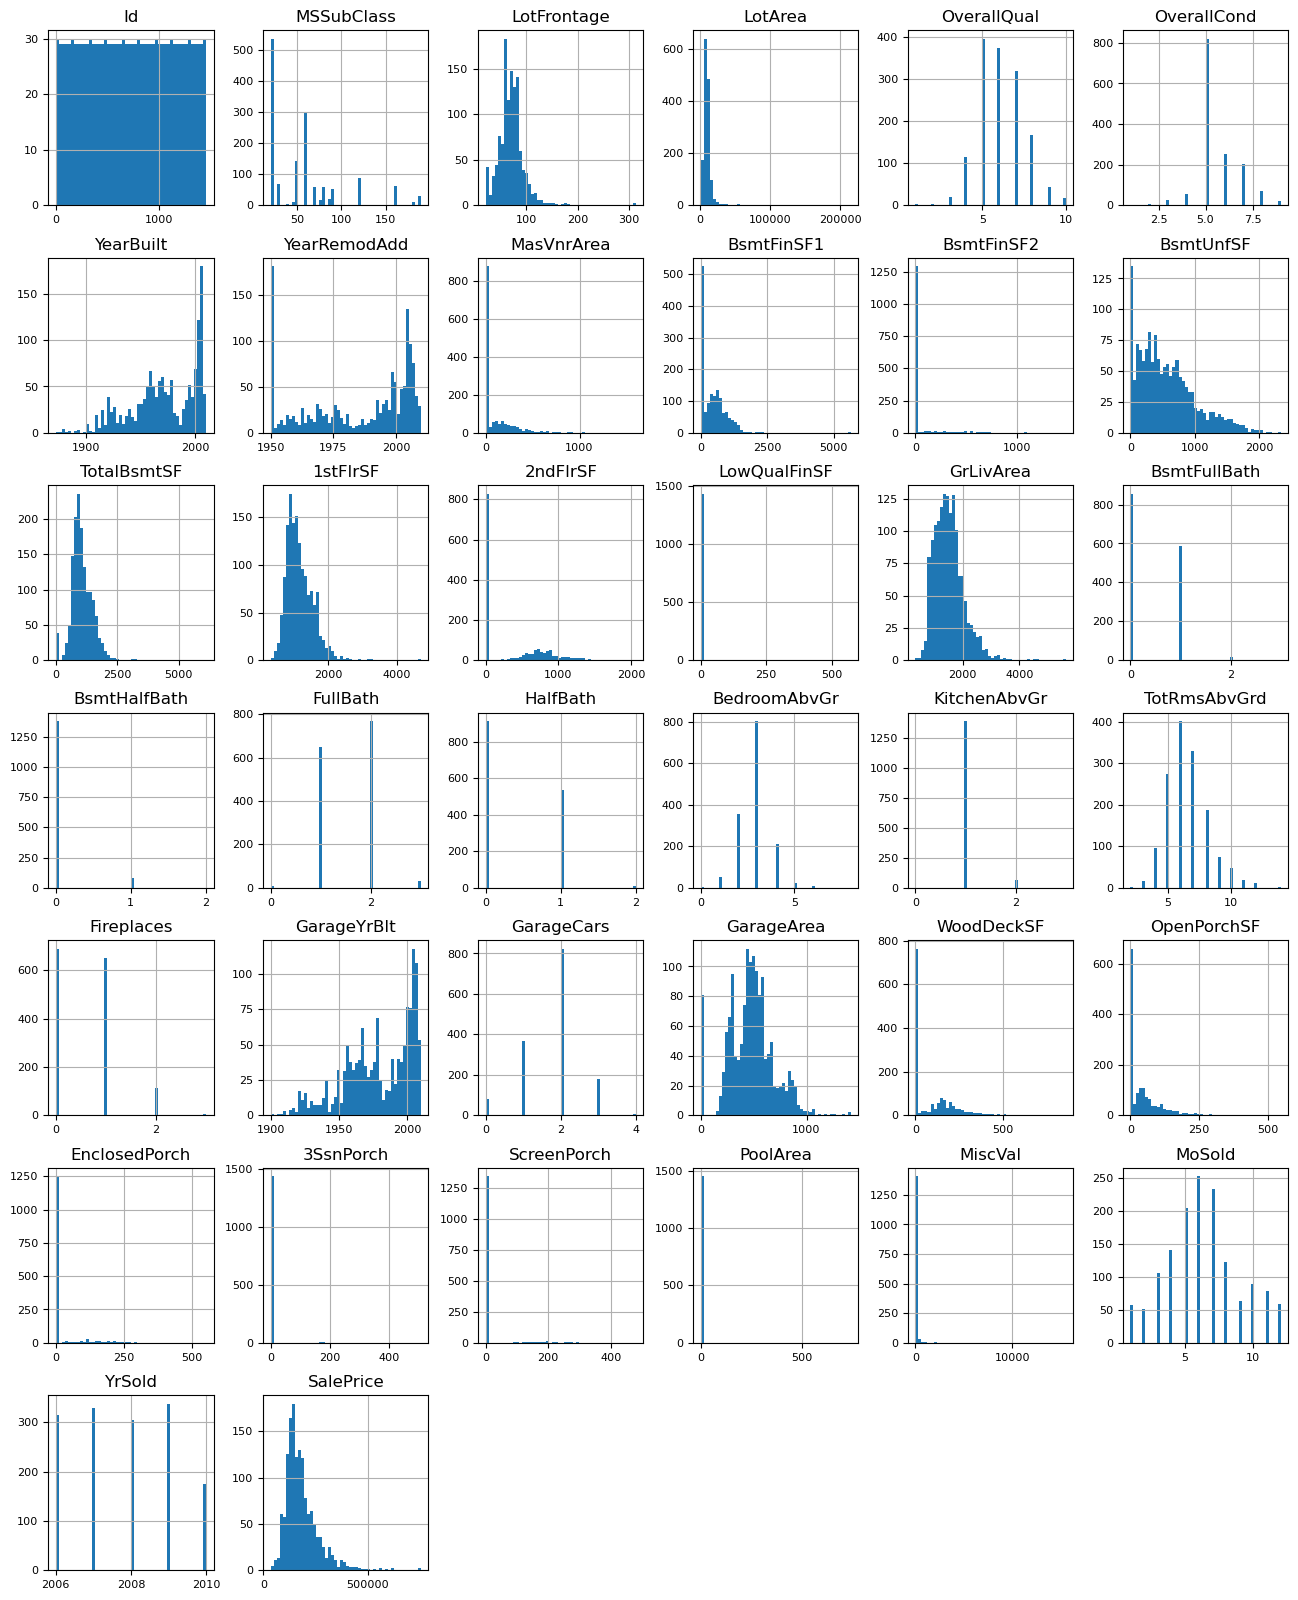

In [297]:
train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

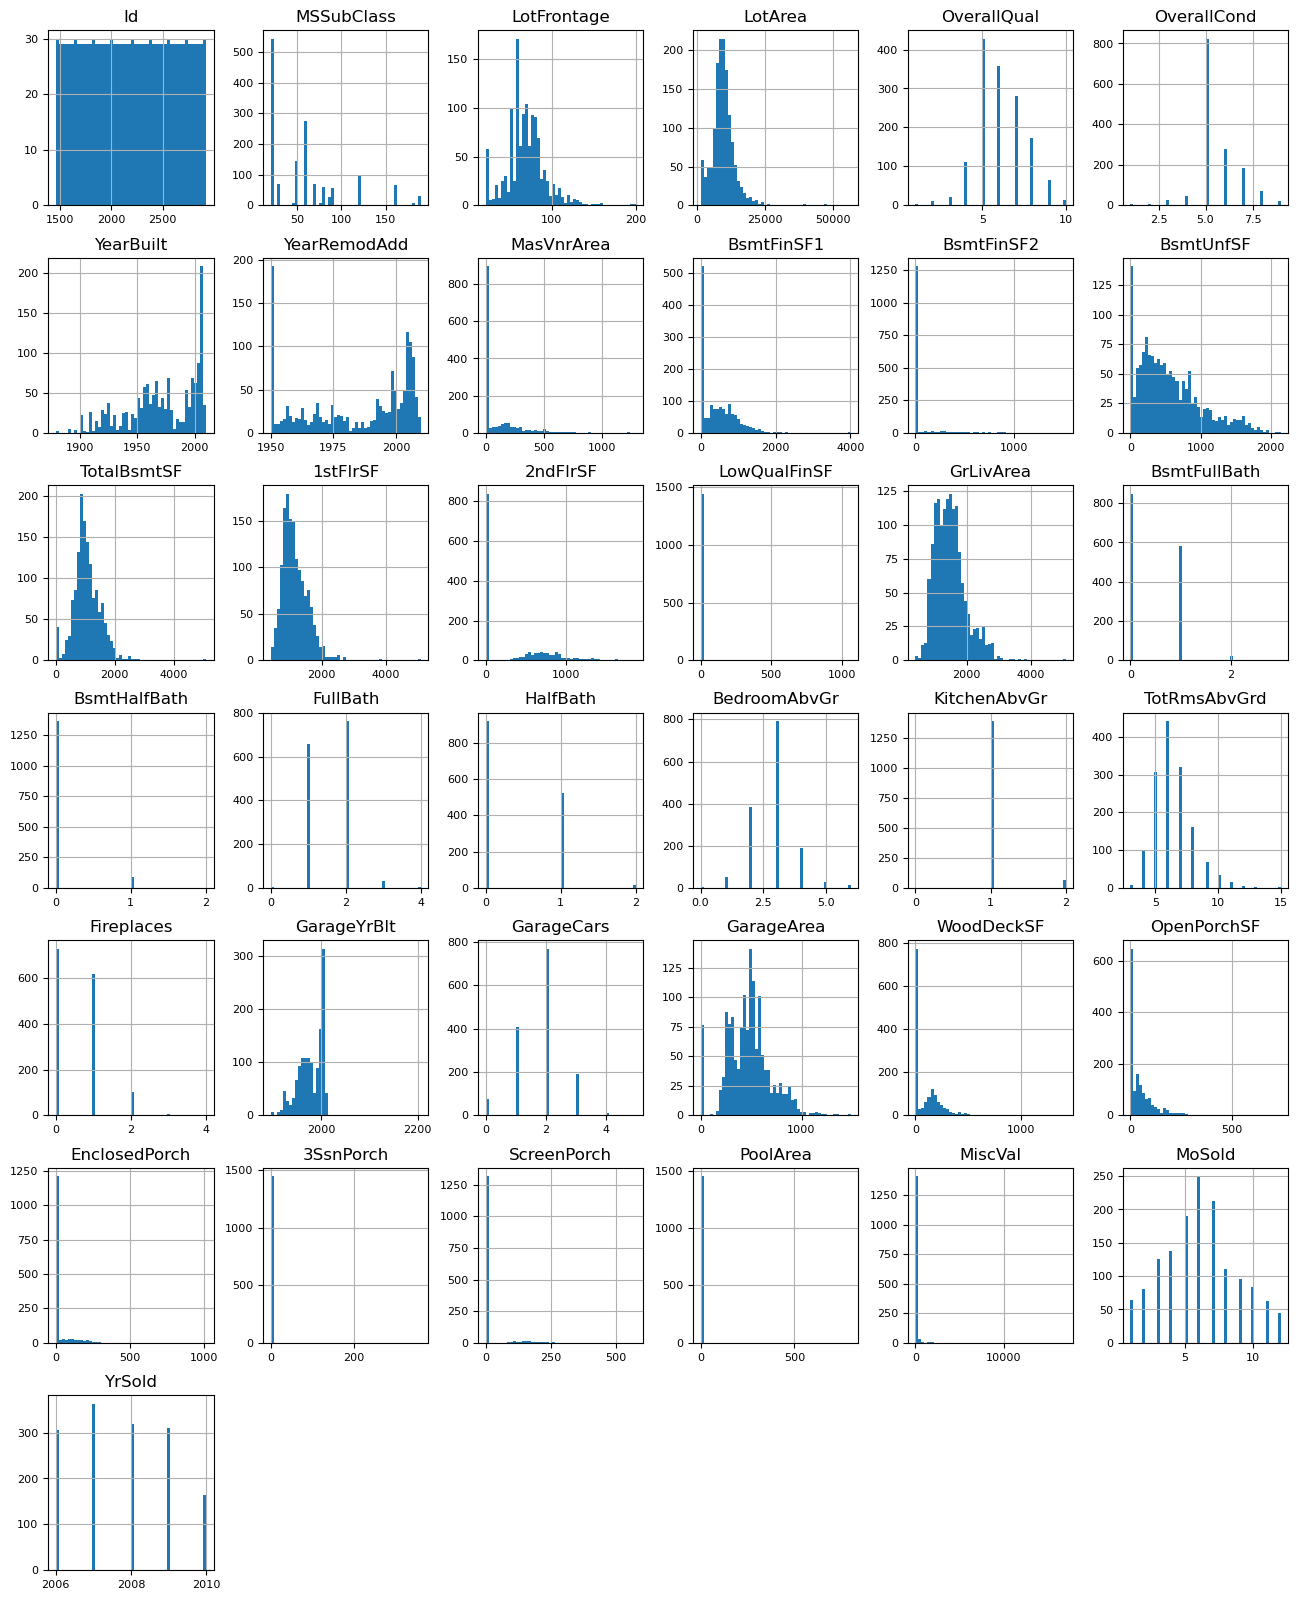

In [298]:
test.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [299]:
def trainnull():
    a=train.isnull().sum().sort_values(ascending =False)
    return(a[0:19])
def testnull():
    b=test.isnull().sum().sort_values(ascending =False)
    return(b[0:33])

<AxesSubplot:>

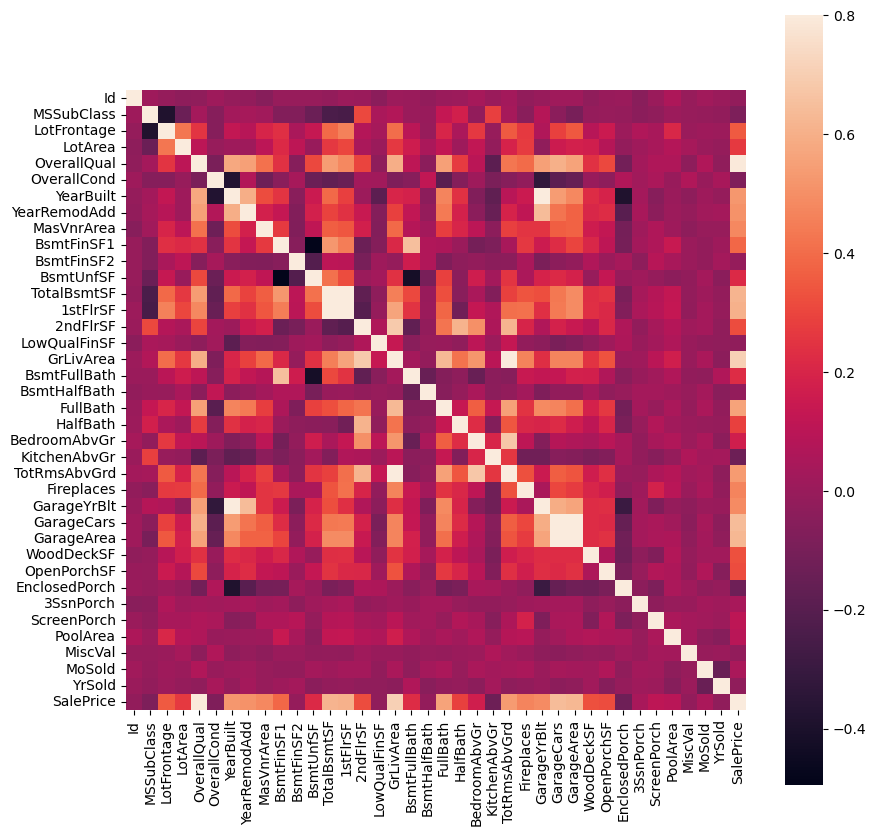

In [300]:
corrmat = train.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True)

In [301]:
train['LotFrontage'].fillna(train['LotFrontage'].dropna().mean(),inplace=True)

In [302]:
test['LotFrontage'].fillna(test['LotFrontage'].dropna().mean(),inplace=True)

In [303]:
train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [304]:
test['GarageType'].value_counts()

Attchd     853
Detchd     392
BuiltIn     98
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64

In [305]:
train['GarageType'].fillna(train['GarageType'].dropna().mode()[0],inplace=True)
test['GarageType'].fillna(test['GarageType'].dropna().mode()[0],inplace=True)


In [306]:
train['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [307]:
test['GarageYrBlt'].value_counts()

2005.0    77
2007.0    66
2006.0    56
2004.0    46
2003.0    42
          ..
1918.0     1
1895.0     1
1932.0     1
1916.0     1
1919.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [308]:
train['GarageYrBlt'].fillna(train['GarageYrBlt'].dropna().mode()[0],inplace=True)
test['GarageYrBlt'].fillna(test['GarageYrBlt'].dropna().mode()[0],inplace=True)

In [309]:
def trcount(col):
    return train[col].value_counts()
def tecount(col):
    return test[col].value_counts()
def trfill(col):
    return train[col].fillna(train[col].dropna().mode()[0],inplace=True)
def tefill(col):
    return test[col].fillna(test[col].dropna().mode()[0],inplace=True)   

In [310]:
trcount('GarageFinish')

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [311]:
tecount('GarageFinish')

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64

In [312]:
tefill('GarageFinish')

In [313]:
trfill('GarageFinish')

In [314]:
testnull()

GarageQual      78
GarageCond      78
BsmtCond        45
BsmtExposure    44
BsmtQual        44
BsmtFinType2    42
BsmtFinType1    42
MasVnrType      16
MasVnrArea      15
MSZoning         4
Functional       2
BsmtFullBath     2
Utilities        2
BsmtHalfBath     2
Exterior2nd      1
BsmtFinSF2       1
BsmtUnfSF        1
KitchenQual      1
BsmtFinSF1       1
TotalBsmtSF      1
Exterior1st      1
SaleType         1
GarageCars       1
GarageArea       1
ScreenPorch      0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
dtype: int64

In [315]:
trainnull()

GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
MasVnrType       8
MasVnrArea       8
Electrical       1
HalfBath         0
Functional       0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
dtype: int64

In [316]:
trcount('GarageQual')

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [317]:
trfill('GarageQual')

In [318]:
tecount('GarageQual')

TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64

In [319]:
tefill('GarageQual')

In [320]:
trainnull()

GarageCond      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
MasVnrType       8
MasVnrArea       8
Electrical       1
HalfBath         0
Functional       0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
LowQualFinSF     0
dtype: int64

In [321]:
testnull()

GarageCond      78
BsmtCond        45
BsmtQual        44
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
MasVnrType      16
MasVnrArea      15
MSZoning         4
Functional       2
BsmtFullBath     2
Utilities        2
BsmtHalfBath     2
Exterior2nd      1
BsmtFinSF2       1
BsmtUnfSF        1
KitchenQual      1
BsmtFinSF1       1
TotalBsmtSF      1
Exterior1st      1
SaleType         1
GarageCars       1
GarageArea       1
ScreenPorch      0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
GarageFinish     0
dtype: int64

In [322]:
trcount('GarageCond')

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [323]:
trfill('GarageCond')

In [324]:
tecount('GarageCond')

TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64

In [325]:
tefill('GarageCond')

In [326]:
testnull()


BsmtCond        45
BsmtQual        44
BsmtExposure    44
BsmtFinType2    42
BsmtFinType1    42
MasVnrType      16
MasVnrArea      15
MSZoning         4
BsmtFullBath     2
BsmtHalfBath     2
Functional       2
Utilities        2
BsmtFinSF1       1
GarageCars       1
BsmtFinSF2       1
BsmtUnfSF        1
KitchenQual      1
Exterior2nd      1
TotalBsmtSF      1
Exterior1st      1
SaleType         1
GarageArea       1
3SsnPorch        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
GarageFinish     0
dtype: int64

In [327]:
trainnull()

BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
MasVnrType       8
MasVnrArea       8
Electrical       1
FullBath         0
HalfBath         0
1stFlrSF         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
LowQualFinSF     0
2ndFlrSF         0
dtype: int64

In [328]:
tecount('BsmtCond')

TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64

In [329]:
trcount('BsmtCond')

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [330]:
tefill('BsmtCond')

In [331]:
trfill('BsmtCond')

In [332]:
tecount('BsmtQual')

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [333]:
trcount('BsmtQual')

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [334]:
trfill('BsmtQual')

In [335]:
tefill('BsmtQual')

In [336]:
tecount('BsmtExposure')

No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64

In [337]:
trcount('BsmtExposure')

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [338]:
tefill('BsmtExposure')

In [339]:
tecount('BsmtExposure')

No    995
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64

In [340]:
trcount('BsmtFinType1')

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [341]:
tecount('BsmtFinType1')

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64

In [342]:
trfill('BsmtFinType1')

In [343]:
tefill('BsmtFinType1')

In [344]:
tecount('BsmtFinType2')

Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64

In [345]:
trcount('BsmtFinType2')

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [346]:
trfill('BsmtFinType2')

In [347]:
tefill('BsmtFinType2')

In [348]:
testnull()

MasVnrType      16
MasVnrArea      15
MSZoning         4
Functional       2
BsmtFullBath     2
BsmtHalfBath     2
Utilities        2
Exterior2nd      1
Exterior1st      1
GarageCars       1
GarageArea       1
KitchenQual      1
TotalBsmtSF      1
BsmtFinSF2       1
BsmtUnfSF        1
SaleType         1
BsmtFinSF1       1
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
FullBath         0
TotRmsAbvGrd     0
GrLivArea        0
Fireplaces       0
LowQualFinSF     0
GarageType       0
1stFlrSF         0
GarageYrBlt      0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
dtype: int64

In [349]:
trainnull()

BsmtExposure    38
MasVnrType       8
MasVnrArea       8
Electrical       1
HalfBath         0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
FullBath         0
GarageType       0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Fireplaces       0
dtype: int64

In [350]:
trcount('BsmtExposure')

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [351]:
tecount('BsmtExposure')

No    995
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64

In [352]:
trfill('BsmtExposure')

In [353]:
tefill('BsmtExposure')

In [354]:
trcount('MasVnrType')

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [355]:
tecount('MasVnrType')

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [356]:
trfill('MasVnrType')

In [357]:
tefill('MasVnrType')

In [358]:
tecount('MasVnrArea')

0.0       877
176.0      10
144.0       9
120.0       8
216.0       8
         ... 
647.0       1
1290.0      1
495.0       1
292.0       1
382.0       1
Name: MasVnrArea, Length: 303, dtype: int64

In [359]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [360]:
train['MasVnrArea'].fillna(train['MasVnrArea'].dropna().mean(),inplace=True)


In [361]:
test['MasVnrArea'].fillna(test['MasVnrArea'].dropna().mean(),inplace=True)

<AxesSubplot:>

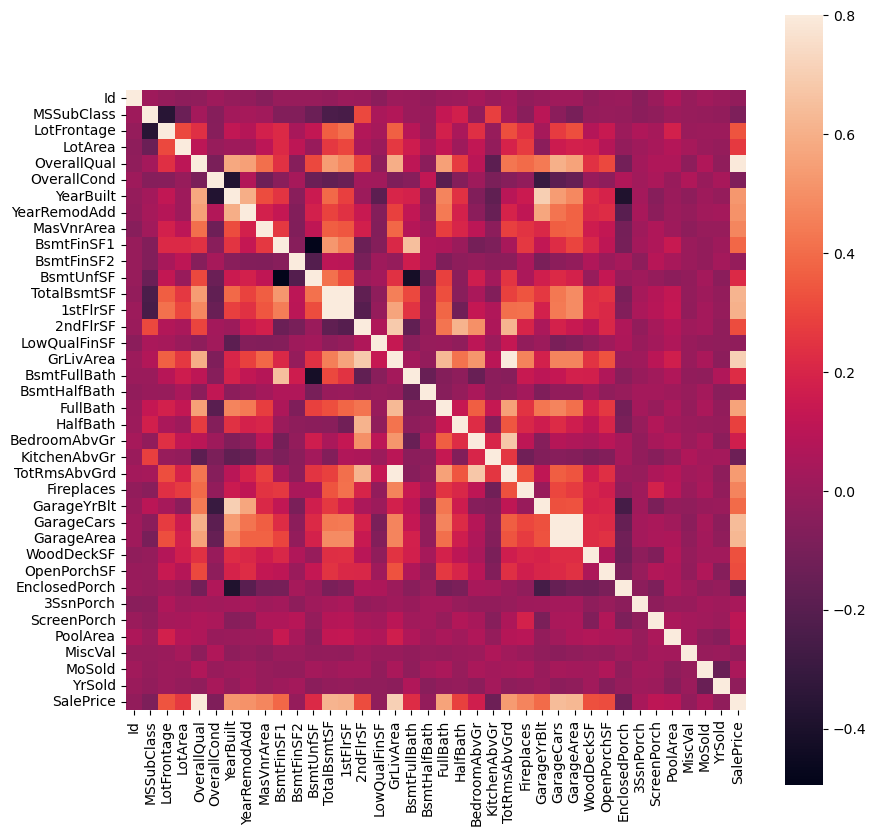

In [362]:
corrmat = train.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True)

In [363]:
trcount('Electrical')

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [364]:
tecount('Electrical')

SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64

In [365]:
trfill('Electrical')

In [366]:
tefill('Electrical')

In [367]:
train['Electrical']=train['Electrical'].replace('Mix','SBrkr')

In [368]:
trcount('Electrical')

SBrkr    1336
FuseA      94
FuseF      27
FuseP       3
Name: Electrical, dtype: int64

In [369]:
trcount('GarageQual')

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [370]:
tecount('GarageQual')

TA    1371
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64

In [371]:
train['GarageQual']=train['GarageQual'].replace('Ex','TA')

In [372]:
trcount('GarageQual')

TA    1395
Fa      48
Gd      14
Po       3
Name: GarageQual, dtype: int64

In [373]:
train.isnull().sum().sort_values(ascending=True)

Id              0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
               ..
Exterior1st     0
RoofMatl        0
RoofStyle       0
ExterCond       0
SalePrice       0
Length: 76, dtype: int64

In [374]:
test.isnull().sum().sort_values(ascending=False)[:15]

MSZoning        4
BsmtHalfBath    2
BsmtFullBath    2
Functional      2
Utilities       2
Exterior1st     1
KitchenQual     1
GarageCars      1
GarageArea      1
BsmtFinSF1      1
TotalBsmtSF     1
BsmtFinSF2      1
BsmtUnfSF       1
SaleType        1
Exterior2nd     1
dtype: int64

In [375]:
tecount('MSZoning')

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [376]:
tefill('MSZoning')

In [377]:
tecount('BsmtHalfBath')

0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64

In [378]:
tefill('BsmtHalfBath')
trcount('BsmtHalfBath')

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [379]:
tecount('BsmtFullBath')

0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64

In [380]:
trcount('BsmtFullBath')

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [381]:
tefill('BsmtFullBath')

In [382]:
tecount('BsmtFullBath')

0.0    851
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64

In [383]:
tecount('Functional')

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [384]:
tefill('Functional')
trcount('Functional')

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [385]:
tecount('Utilities')

AllPub    1457
Name: Utilities, dtype: int64

In [386]:
tefill('Utilities')
trcount('Utilities')
train['Utilities']='AllPub'
trcount('Utilities')

AllPub    1460
Name: Utilities, dtype: int64

In [387]:
tecount('Exterior1st')

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [388]:
tefill('Exterior1st')
trcount('Exterior1st')

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [389]:
train['Exterior1st']=train['Exterior1st'].replace('Stone','VinylSd')

In [390]:
tecount('TotalBsmtSF')

0.0       41
864.0     39
960.0     13
546.0     12
768.0     12
          ..
1146.0     1
1415.0     1
764.0      1
1367.0     1
996.0      1
Name: TotalBsmtSF, Length: 736, dtype: int64

In [391]:
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].dropna().mean(),inplace=True)

In [392]:
tecount('SaleType')

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [393]:
tefill('SaleType')

In [394]:
tecount('Exterior2nd')

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [395]:
tefill('Exterior2nd')

In [396]:
tecount('BsmtUnfSF')

0.0       123
384.0      11
624.0       8
738.0       7
100.0       7
         ... 
36.0        1
892.0       1
747.0       1
1216.0      1
1503.0      1
Name: BsmtUnfSF, Length: 793, dtype: int64

In [397]:
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].dropna().mean(),inplace=True)

In [398]:
tecount('BsmtFinSF2')

0.0      1278
483.0       3
162.0       3
294.0       3
144.0       2
         ... 
110.0       1
186.0       1
449.0       1
48.0        1
344.0       1
Name: BsmtFinSF2, Length: 161, dtype: int64

In [399]:
tefill('BsmtFinSF2')

In [400]:
tecount('KitchenQual')

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [401]:
tefill('KitchenQual')

In [402]:
tecount('BsmtFinSF1')

0.0       462
24.0       15
276.0       6
602.0       6
300.0       5
         ... 
1337.0      1
656.0       1
706.0       1
496.0       1
337.0       1
Name: BsmtFinSF1, Length: 669, dtype: int64

In [403]:
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].dropna().mean(),inplace=True)

In [404]:
tecount('GarageCars')

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64

In [405]:
tefill('GarageCars')

In [406]:
tecount('GarageArea')

0.0       76
576.0     50
440.0     47
484.0     34
400.0     33
          ..
453.0      1
1348.0     1
567.0      1
811.0      1
682.0      1
Name: GarageArea, Length: 459, dtype: int64

In [407]:
test['GarageArea'].fillna(test['GarageArea'].dropna().mean(),inplace=True)

In [408]:
test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

<AxesSubplot:>

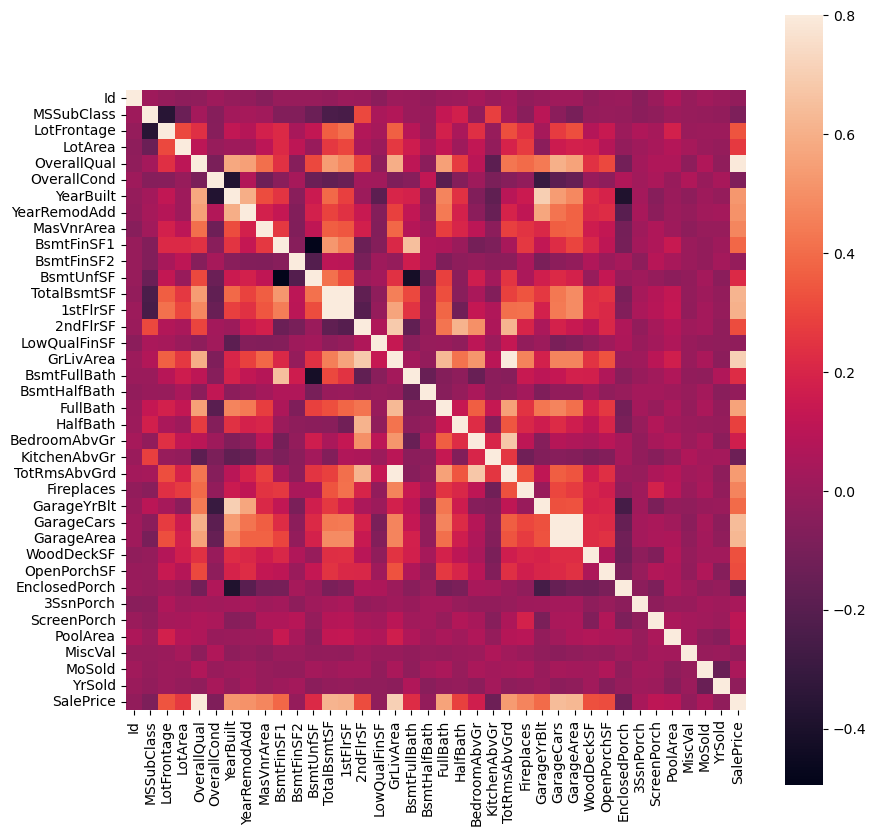

In [409]:
corrmat = train.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True)

In [410]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [411]:
catlist = train.select_dtypes(include=['object', 'category']).columns.tolist()
catlist

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [412]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [413]:
train[catlist]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [414]:
dummies = pd.get_dummies(train[catlist], prefix=catlist, prefix_sep='_')

train = pd.concat([train, dummies], axis=1)
    
    


In [415]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,1,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,1,0,0,0,0,1,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,1,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,1,1,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,1,0,0,0,0,1,0


In [416]:
dummies = pd.get_dummies(test[catlist], prefix=catlist, prefix_sep='_')

test= pd.concat([test, dummies], axis=1)
    

In [417]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,0,1,0,0,0,0,1,0


In [418]:
test=test.drop(catlist,axis=1)
train = train.drop(catlist,axis=1)

In [419]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0


In [420]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [421]:
transpose = train.T

In [422]:
transpose

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.000000,9.0,10.0,...,1451.0,1452.0,1453.0,1454.0,1455.0,1456.0,1457.0,1458.0,1459.0,1460.0
MSSubClass,60.0,20.0,60.0,70.0,60.0,50.0,20.0,60.000000,50.0,190.0,...,90.0,20.0,180.0,20.0,20.0,60.0,20.0,70.0,20.0,20.0
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,70.049958,51.0,50.0,...,60.0,78.0,35.0,90.0,62.0,62.0,85.0,66.0,68.0,75.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.000000,6120.0,7420.0,...,9000.0,9262.0,3675.0,17217.0,7500.0,7917.0,13175.0,9042.0,9717.0,9937.0
OverallQual,7.0,6.0,7.0,7.0,8.0,5.0,8.0,7.000000,7.0,5.0,...,5.0,8.0,5.0,5.0,7.0,6.0,6.0,7.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SaleCondition_Alloca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SaleCondition_Family,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SaleCondition_Normal,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.000000,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [423]:
transpose = transpose.drop_duplicates()

In [424]:
transpose

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.000000,9.0,10.0,...,1451.0,1452.0,1453.0,1454.0,1455.0,1456.0,1457.0,1458.0,1459.0,1460.0
MSSubClass,60.0,20.0,60.0,70.0,60.0,50.0,20.0,60.000000,50.0,190.0,...,90.0,20.0,180.0,20.0,20.0,60.0,20.0,70.0,20.0,20.0
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,70.049958,51.0,50.0,...,60.0,78.0,35.0,90.0,62.0,62.0,85.0,66.0,68.0,75.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.000000,6120.0,7420.0,...,9000.0,9262.0,3675.0,17217.0,7500.0,7917.0,13175.0,9042.0,9717.0,9937.0
OverallQual,7.0,6.0,7.0,7.0,8.0,5.0,8.0,7.000000,7.0,5.0,...,5.0,8.0,5.0,5.0,7.0,6.0,6.0,7.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SaleCondition_Alloca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SaleCondition_Family,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SaleCondition_Normal,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.000000,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [425]:
train= transpose.T

In [426]:
transpose = test.T

In [427]:
transpose = transpose.drop_duplicates()

In [428]:
transpose

,0,1,2,3,4,5,6,7,8,9,...,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458
Id,1461.0,1462.0,1463.0,1464.0,1465.0,1466.0,1467.000000,1468.0,1469.0,1470.0,...,2910.0,2911.0,2912.0,2913.0,2914.0,2915.0,2916.0,2917.0,2918.0,2919.0
MSSubClass,20.0,20.0,60.0,60.0,120.0,60.0,20.000000,60.0,20.0,20.0,...,180.0,160.0,20.0,160.0,160.0,160.0,160.0,20.0,85.0,60.0
LotFrontage,80.0,81.0,74.0,78.0,43.0,75.0,68.580357,63.0,85.0,70.0,...,21.0,21.0,80.0,21.0,21.0,21.0,21.0,160.0,62.0,74.0
LotArea,11622.0,14267.0,13830.0,9978.0,5005.0,10000.0,7980.000000,8402.0,10176.0,8400.0,...,1470.0,1484.0,13384.0,1533.0,1526.0,1936.0,1894.0,20000.0,10441.0,9627.0
OverallQual,5.0,6.0,5.0,6.0,8.0,6.0,6.000000,6.0,7.0,4.0,...,4.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SaleCondition_Alloca,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SaleCondition_Family,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SaleCondition_Normal,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0


In [429]:
test = transpose.T

In [430]:
test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,2916.0,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,2917.0,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,2918.0,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [431]:
train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [432]:
listtest = test.columns
listtest

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=254)

In [433]:
listtrain = train.columns
listtrain

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=267)

In [434]:

list1 = listtrain.intersection(listtest)
list1

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=253)

In [435]:
ytrain = pd.DataFrame()

In [436]:
ytrain = train[['SalePrice']]

In [437]:
xtrain = train[list1]

In [438]:
xtrain

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [439]:
xtest=test[list1]

In [440]:
xtest

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,2916.0,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,2917.0,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,2918.0,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [441]:
xtrain=xtrain.drop('Id',axis=1)
result=xtest[['Id']]
xtest = xtest.drop('Id',axis=1)

In [442]:
xtest.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [443]:
xtest.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


2006.0    67
2005.0    64
2004.0    54
2007.0    49
2003.0    45
          ..
1875.0     1
1911.0     1
1917.0     1
1872.0     1
1905.0     1
Name: YearBuilt, Length: 112, dtype: int64

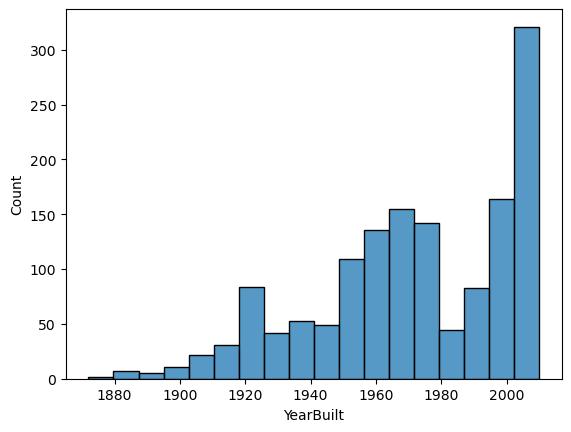

In [444]:
sns.histplot(data=xtrain, x='YearBuilt')
train['YearBuilt'].value_counts()


In [445]:
from sklearn.preprocessing import MinMaxScaler


In [446]:
xtest

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [447]:
xtrain.iloc[:,0:35]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,...,2.0,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0
1456,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,...,2.0,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1457,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,...,1.0,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0
1458,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,1029.0,...,1.0,240.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0


In [448]:
xtrain['YrSold'].value_counts()

2009.0    338
2007.0    329
2006.0    314
2008.0    304
2010.0    175
Name: YrSold, dtype: int64

In [449]:
xtrain.iloc[:,0:35]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,...,2.0,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0
1456,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,...,2.0,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1457,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,...,1.0,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0
1458,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,1029.0,...,1.0,240.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0


In [450]:
xtrain['MoSold'].value_counts()

6.0     253
7.0     234
5.0     204
4.0     141
8.0     122
3.0     106
10.0     89
11.0     79
9.0      63
12.0     59
1.0      58
2.0      52
Name: MoSold, dtype: int64

<AxesSubplot:xlabel='MoSold', ylabel='Count'>

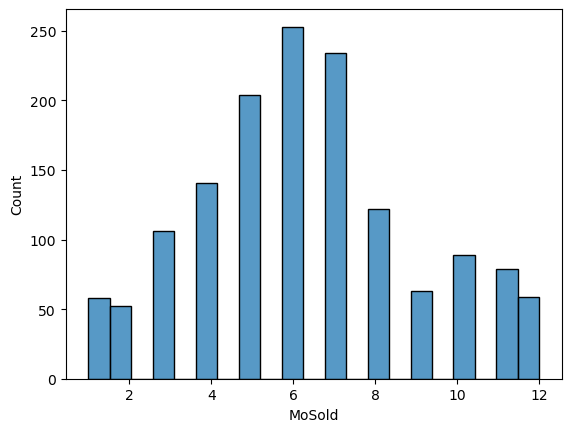

In [451]:
sns.histplot(data=xtrain, x='MoSold')

In [452]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


xxtrain = pd.DataFrame(scaler.fit_transform(xtrain), columns=xtrain.columns)
xxtrain

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [453]:
xxtest = pd.DataFrame(scaler.fit_transform(xtest), columns=xtest.columns)
xxtest

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.329609,0.184147,0.444444,0.625,0.625954,0.183333,0.000000,0.116708,0.094364,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.335196,0.232124,0.555556,0.625,0.603053,0.133333,0.083721,0.230175,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.296089,0.224197,0.444444,0.500,0.900763,0.800000,0.000000,0.197257,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.235294,0.318436,0.154326,0.555556,0.625,0.908397,0.800000,0.015504,0.150125,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.588235,0.122905,0.064121,0.777778,0.500,0.862595,0.700000,0.000000,0.065586,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,0.000000,0.008453,0.333333,0.750,0.694656,0.333333,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,0.823529,0.000000,0.007691,0.333333,0.500,0.694656,0.333333,0.000000,0.062843,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,0.000000,0.776536,0.336115,0.444444,0.750,0.618321,0.766667,0.000000,0.305237,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,0.382353,0.229050,0.162724,0.444444,0.500,0.862595,0.700000,0.000000,0.084040,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [454]:
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(xxtrain,ytrain)


LinearRegression()

In [455]:
ypred = Lr.predict(xxtest)
ypred

array([[-3.93729470e+12],
       [-3.75671385e+13],
       [-4.38184211e+13],
       ...,
       [-7.81279844e+13],
       [ 7.02527423e+12],
       [-3.55332324e+13]])

In [456]:
Lr.score(xxtrain,ytrain)

0.9104667018871854

In [457]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2

polyLr = PolynomialFeatures(degree=degree)
xpoly = polyLr.fit_transform(xxtrain)
Lr.fit(xpoly, ytrain)
Lr.score(xpoly,ytrain)

1.0

In [458]:
from sklearn.linear_model import Ridge
Rdg = Ridge(alpha=1)
Rdg.fit(xxtrain, ytrain)
Rdg.score(xxtrain,ytrain)

0.9056254430445441

In [459]:
from sklearn.linear_model import Lasso
Las = Lasso(alpha=1)
Las.fit(xxtrain, ytrain)
Las.score(xxtrain,ytrain)

0.9103787906920269

In [460]:
from sklearn.linear_model import ElasticNet
EN = ElasticNet(alpha=1, l1_ratio=0.5)
EN.fit(xxtrain, ytrain)
EN.score(xxtrain, ytrain)

0.6522582122392537

In [461]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(xxtrain, ytrain)
svr.score(xxtrain, ytrain)

0.24914000402662517

In [462]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=5)
DTR.fit(xtrain, ytrain)
DTR.score(xtrain,ytrain)

0.8618560549553314

In [463]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100, max_depth=15)
RFR.fit(xxtrain, ytrain)
RFR.score(xxtrain,ytrain)

0.9798274363698705

In [464]:

import warnings
warnings.filterwarnings('ignore')

param_grid_rfr = {'n_estimators': [100, 200, 300], 'max_depth': [2, 4, 6, 8, 10]}


In [465]:
from sklearn.model_selection import GridSearchCV




GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=5),
             param_grid={'max_depth': [2, 4, 6, 8, 10]})

0.9597242893744844

In [467]:
\

{'max_depth': 8}

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

0.9104664766214208

{'fit_intercept': False}

GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=15),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 200, 300]})

0.9758662531891543

{'max_depth': 10, 'n_estimators': 200}

GridSearchCV(cv=5, estimator=Lasso(alpha=1),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'fit_intercept': [True, False]})

0.9083440564134966

{'alpha': 10, 'fit_intercept': False}

GridSearchCV(cv=5, estimator=Ridge(alpha=1),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'fit_intercept': [True, False]})

0.8879452869129587

{'alpha': 10, 'fit_intercept': False}

In [481]:
models = [Lr,Rdg, Las,EN,svr,DTR,RFR]
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet','Support Vector Regression','Decision Tree Regression', 'Random Forest Regression']

# Loop over regression models and print their cross-validated scores
for model, name in zip(models, model_names):
    scores = cross_val_score(model, xxtrain, ytrain, scoring = 'neg_root_mean_squared_error', cv=6)
    mean_score = -scores.mean()
    print("{} : {:.3f}".format(name, mean_score))
scores = cross_val_score(Lr,xpoly,ytrain,scoring= 'neg_root_mean_squared_error',cv=6)
scorees=-scores.mean()
print("Poly  : ", scorees)

Linear Regression : 272537784480559.281
Ridge Regression : 32826.339
Lasso Regression : 35725.063
ElasticNet : 47252.790
Support Vector Regression : 70265.106
Decision Tree Regression : 41621.128
Random Forest Regression : 29433.094
Poly  :  36210.1213585496


SyntaxError: invalid syntax (1485579625.py, line 3)

In [483]:
param_grid_rfr = {'n_estimators': [100, 200, 300], 'max_depth': [2, 4, 6, 8, 10]}
grid_rfr = GridSearchCV(RFR, param_grid_rfr, cv=5)

In [484]:
grid_rfr.fit(xxtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=15),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 200, 300]})

In [485]:
grid_rfr.best_params_

{'max_depth': 10, 'n_estimators': 300}

In [486]:
grid_rfr.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=300)

In [487]:
final=RandomForestRegressor(max_depth=10, n_estimators=300)
final.fit(xxtrain,ytrain)

RandomForestRegressor(max_depth=10, n_estimators=300)

In [488]:
final.score(xxtrain,ytrain)

0.9767202823371733

In [501]:
ypedict= final.predict(xxtest)

In [502]:
ypedict

array([136367.08932208, 157953.11435903, 191642.08540495, ...,
       155381.93603015, 130022.98433959, 269125.55258418])

In [503]:
result['Id']=result['Id'].astype(int)
result

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [500]:
len(ypedict)

1460

In [504]:
result['SalePrice']=ypedict
result

,Id,SalePrice
0,1461,136367.089322
1,1462,157953.114359
2,1463,191642.085405
3,1464,202408.235262
4,1465,221712.030560
...,...,...
1454,2915,91805.012741
1455,2916,94356.069020
1456,2917,155381.936030
1457,2918,130022.984340


In [506]:
result.to_csv("/kaggle/working/result.csv",index=False)
